# 2023-02-21

# Unsupervised Learning

## 1. 차원축소

## PCA분석(주성분 분석) 실습

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
X.shape

(569, 30)

In [3]:
# StandardScaler를 활용하여 스케일 변환

from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
# PCA

from sklearn.decomposition import PCA             # PCA 라이브러리 
pca = PCA(n_components = 2)                       # n_components = 2 -> 주성분의 갯수
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print('원본 데이터 사이즈:', X_scaled.shape)
print('차원축소 데이터 사이즈:', X_pca.shape)
print(pca.explained_variance_ratio_)              # 주성분들이 원본 데이터를 설명하는 비율
print(pca.explained_variance_ratio_.sum())        # 각 주성분의 설명하는 비율의 합

원본 데이터 사이즈: (569, 30)
차원축소 데이터 사이즈: (569, 2)
[0.44272026 0.18971182]
0.6324320765155943


In [9]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [22]:
component1 = X_pca[:, 0]    # x축 데이터만 (주성분1)

In [23]:
component2 = X_pca[:, 1]    # y축 데이터만 (주성분2)

In [24]:
# scatter를 그리기위해 cancer의 target을 color로 지정

target = cancer.target

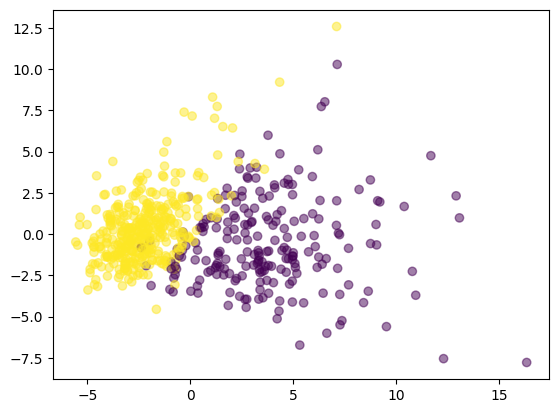

In [25]:
# 시각화하기

import matplotlib.pyplot as plt
plt.scatter(component1, component2, c = target, alpha=0.5)

In [12]:
X_pca.shape

(569, 2)

In [26]:
pca.components_    # 각 성분에 컬럼 정보가 어느정도 담겨 있는지 확인할 수 있다.

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

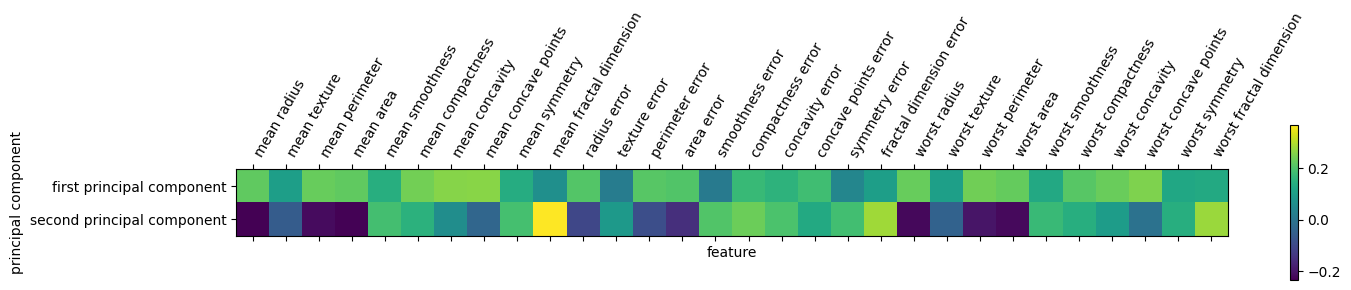

In [27]:
# 위에서 얻어낸 정보를 시각화하기

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first principal component", "second principal component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("principal component")
plt.show()

### 주성분 분석 실습

In [128]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [125]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [142]:
# scale 변환 (RobustScaler)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

iris_scaled_data = scaler.fit_transform(iris_input_data)

In [143]:
# 차원축소

from sklearn.decomposition import PCA             # PCA 라이브러리 
pca = PCA(n_components = 2)                       # n_components = 2 -> 주성분의 갯수
pca.fit(iris_scaled_data)

iris_pca = pca.transform(iris_scaled_data)
iris_pca

array([[ 1.41374382e+00, -2.43252110e-02],
       [ 8.31381796e-01, -8.48814157e-01],
       [ 1.17234826e+00, -6.45957746e-01],
       [ 1.05072274e+00, -8.21646731e-01],
       [ 1.57783659e+00,  8.08084908e-02],
       [ 1.73688939e+00,  7.54610983e-01],
       [ 1.42534787e+00, -3.66916729e-01],
       [ 1.30489922e+00, -2.07425188e-01],
       [ 8.71376309e-01, -1.21007966e+00],
       [ 9.77069556e-01, -7.12254816e-01],
       [ 1.55907570e+00,  4.06796354e-01],
       [ 1.36014739e+00, -2.85391464e-01],
       [ 8.93786801e-01, -9.10176777e-01],
       [ 1.10220230e+00, -1.14585292e+00],
       [ 1.85159494e+00,  9.98784920e-01],
       [ 2.31079870e+00,  1.60696658e+00],
       [ 1.78801307e+00,  7.24967014e-01],
       [ 1.38535336e+00, -5.65122431e-03],
       [ 1.53315798e+00,  7.16180563e-01],
       [ 1.76280711e+00,  4.45226775e-01],
       [ 1.14327919e+00, -2.18486682e-02],
       [ 1.60433843e+00,  3.16078426e-01],
       [ 1.76501846e+00, -1.19590014e-01],
       [ 1.

In [144]:
pca.components_

array([[-0.44218911,  0.65039111, -0.44733222, -0.42585686],
       [ 0.55495224,  0.73911168,  0.25938473,  0.2801098 ]])

In [145]:
compon1 = iris_pca[:, 0]    # x축 데이터만 (주성분1)

In [146]:
compon2 = iris_pca[:, 1]    # y축 데이터만 (주성분2)

In [147]:
# scatter를 그리기위해 iris의 target을 color로 지정

target = iris.target

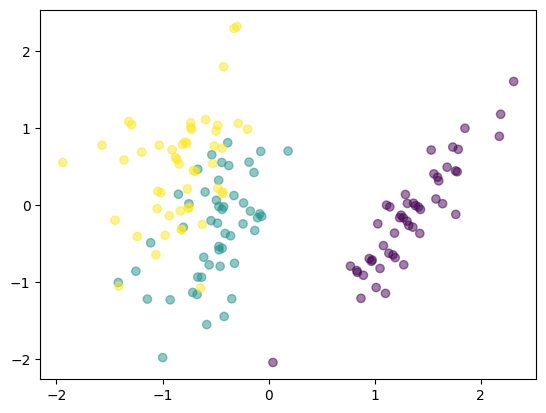

In [148]:
# 차원 축소한 데이터 시각화하기

import matplotlib.pyplot as plt
plt.scatter(compon1, compon2, c = target, alpha=0.5)

In [149]:
# 주성분들이 원본 데이터를 설명하는 비율

print(pca.explained_variance_ratio_)              
print(pca.explained_variance_ratio_.sum())        # 각 주성분의 설명하는 비율의 합
pca_explain = pca.explained_variance_ratio_

[0.61972166 0.3475765 ]
0.967298162437516


<BarContainer object of 2 artists>

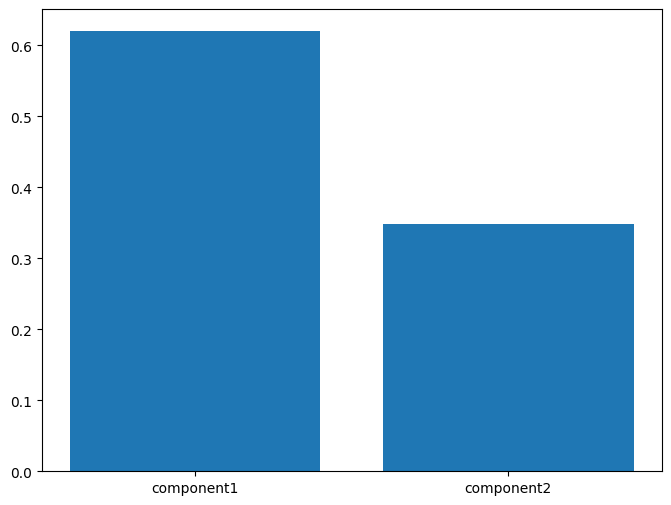

In [150]:
# 주성분들이 원본데이터를 얼마나 설명하는지 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(x = ['component1', 'component2'], height=pca_explain)

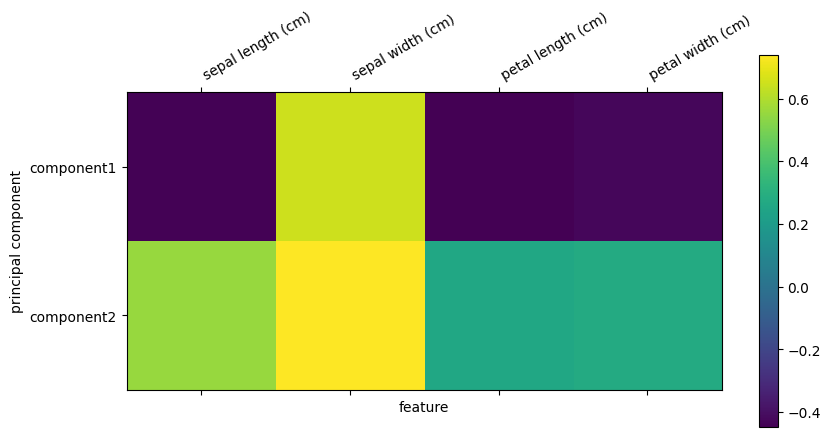

In [151]:
# 각 성분이 칼럼의 정보를 어느정도 설명하는지 히트맵

plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['component1', 'component2'])
plt.colorbar()
plt.xticks(range(len(iris_input_data.columns)),
           iris_input_data.columns, rotation=30, ha='left')
plt.xlabel("feature")
plt.ylabel("principal component")
plt.show()

## Clustering(군집화)

### K-means clustering

In [152]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100,               # 데이터 갯수
                 n_features=2,                # X, y
                 centers=5,                   # 데이터 중심 갯수
                 random_state=10)

In [156]:
input_data = pd.DataFrame(X, columns = ['feature1', 'feature2'])
target_data = pd.DataFrame(y, columns = ['target'])

df = pd.concat([input_data, target_data], axis = 1)
df

,feature1,feature2,target
0,-5.577854,5.872988,3
1,1.627832,4.178069,1
2,-6.950884,-9.024594,4
3,-0.952769,-5.034316,2
4,6.550104,-7.912339,0
...,...,...,...
95,3.719148,3.557522,1
96,-7.697481,-8.356274,4
97,-6.745814,5.757279,3
98,-5.096242,2.231017,3


<AxesSubplot: xlabel='feature1', ylabel='feature2'>

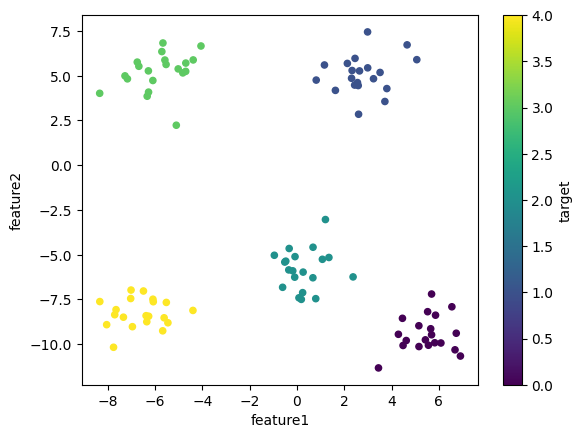

In [168]:
# 원본의 target 시각화

df.plot.scatter(x = 'feature1', y='feature2', c = 'target', colormap = 'viridis')

In [164]:
# Kmeans clustering (labeling)

from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 5, random_state = 1004)

kmc.fit(df.iloc[:, :-1])                              # df의 iloc로 지정한 데이터를 K-means clustering으로 fitting
label_kmc = kmc.labels_
print(label_kmc)

[3 1 0 4 2 3 3 0 2 3 0 3 2 4 2 3 1 4 2 3 3 4 1 0 3 3 4 2 0 1 4 4 2 4 3 2 0
 4 0 1 4 4 4 2 0 0 3 2 1 2 1 2 3 0 2 2 4 1 4 0 2 1 1 4 3 1 2 1 2 0 0 3 1 2
 4 4 0 1 3 3 2 2 1 4 1 0 4 0 4 0 1 0 3 1 1 1 0 3 3 0]


C:\Users\GM220808\.venv\Practice1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [170]:
# kmc로 labeling을 한 데이터를 원본 df에 'label_kmc'컬럼에 추가

df['label_kmc'] = label_kmc
df.head()

,feature1,feature2,target,label_kmc
0,-5.577854,5.872988,3,3
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,0
3,-0.952769,-5.034316,2,4
4,6.550104,-7.912339,0,2


<AxesSubplot: xlabel='feature1', ylabel='feature2'>

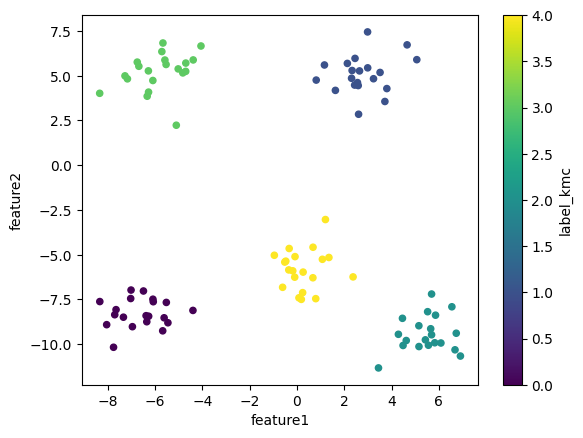

In [171]:
# kmc로 예측한 데이터를 시각화

df.plot.scatter(x = 'feature1', y='feature2', c = 'label_kmc', colormap = 'viridis')

### [실습]

In [269]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [270]:
X = iris.iloc[:, :4]
y = iris.iloc[:, -1]

In [271]:
# scale 변환 (RobustScaler)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

iris_scaled_data = scaler.fit_transform(X)

In [295]:
# 차원축소

from sklearn.decomposition import PCA             # PCA 라이브러리 
pca = PCA(n_components = 2)                       # n_components = 2 -> 주성분의 갯수
pca.fit(iris_scaled_data)

iris_pca = pca.transform(iris_scaled_data)
df_iris_pca = pd.DataFrame(iris_pca, columns=['components1', 'components2'])
df_iris_pca

,components1,components2
0,1.413744,-0.024325
1,0.831382,-0.848814
2,1.172348,-0.645958
3,1.050723,-0.821647
4,1.577837,0.080808
...,...,...
145,-0.862755,0.593353
146,-1.237964,-0.406031
147,-0.709554,0.451953
148,-0.197931,0.986021


<AxesSubplot: xlabel='0', ylabel='1'>

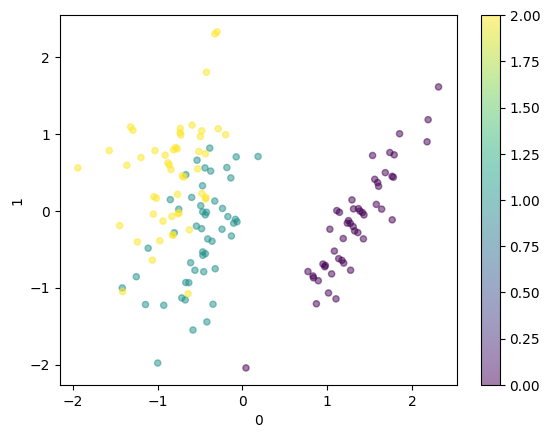

In [292]:
df_iris_pca.plot.scatter(df_iris_pca.columns[0], df_iris_pca.columns[1], c=y, alpha=0.5, colormap = 'viridis')    

In [294]:
# Kmeans clustering (labeling)

from sklearn.cluster import KMeans
kmc = KMeans(n_clusters = 3, random_state = 1004)

kmc.fit(iris_pca)                              # df의 iloc로 지정한 데이터를 K-means clustering으로 fitting
label_kmc = kmc.labels_
print(label_kmc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 2 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 2 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1]


C:\Users\GM220808\.venv\Practice1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [297]:
df_iris_pca['label_kmc'] = label_kmc
df_iris_pca

,components1,components2,label_kmc
0,1.413744,-0.024325,0
1,0.831382,-0.848814,0
2,1.172348,-0.645958,0
3,1.050723,-0.821647,0
4,1.577837,0.080808,0
...,...,...,...
145,-0.862755,0.593353,1
146,-1.237964,-0.406031,2
147,-0.709554,0.451953,1
148,-0.197931,0.986021,1


<AxesSubplot: xlabel='components1', ylabel='components2'>

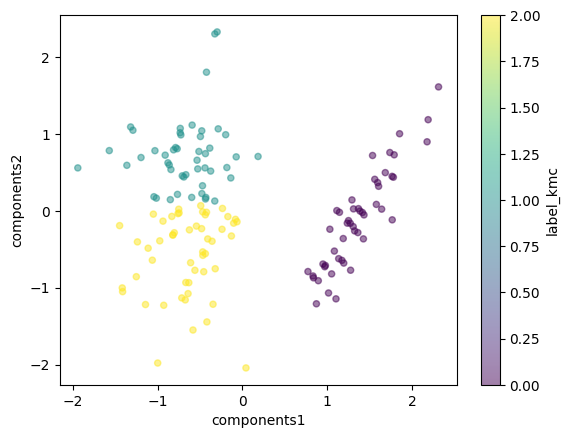

In [301]:
# kmc로 예측한 데이터를 시각화

df_iris_pca.plot.scatter(df_iris_pca.columns[0], df_iris_pca.columns[1], c = 'label_kmc', cmap='viridis', alpha=0.5)

### DBSCAN

In [1]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
                 noise=0.05 ,
                 random_state=0)

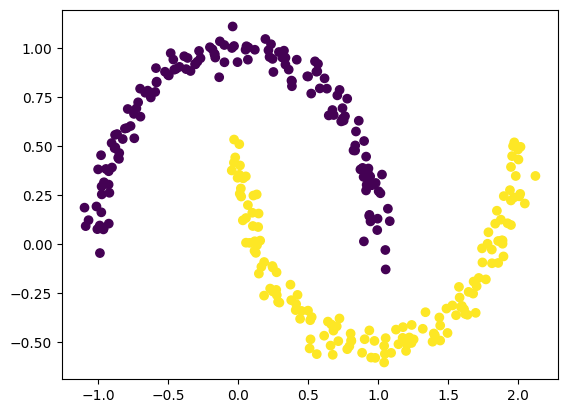

In [2]:
# 원본 target 시각화

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)

In [50]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(min_samples = 20, eps = 0.3)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

[0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0
 0 1 1 0]


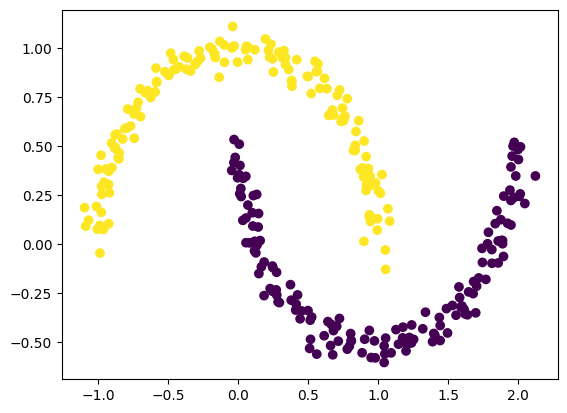

In [51]:
# DBSCAN이 clustering한 결과로 시각화

plt.scatter(X[:, 0], X[:, 1], c = label_dbs)

## Ensemble Model

### Voting

In [251]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [260]:
# input, target 분리

X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

In [261]:
# train, test 분리

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [262]:
# 스케일 변환

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [263]:
# 앙상블 모델(voting) 모델링

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', 
                          random_state=1)
clf2 = svm.SVC(kernel='linear', 
               random_state=1) 
clf3 = GaussianNB()

clf_voting = VotingClassifier(
                estimators=[
                    ('lr', clf1), 
                    ('svm', clf2), 
                    ('gnb', clf3)
                ],
                voting='hard',
                weights=[1,1,1])
clf_voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear', random_state=1)),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [265]:
# 예측

pred_voting = clf_voting.predict(X_test_scaled)
pred_voting

array([0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       2, 0, 2, 0, 2, 2, 1, 1])

In [266]:
# X_train_scaled, y_train간의 score 확인하기

clf_voting.score(X_train_scaled, y_train)

0.9666666666666667